## Importing Libraries

In [3]:
import numpy as np 
import pandas as pd 
from pycaret.classification import *
import sweetviz as sv
import seaborn as sns
import logging, sys


## Exploratory Data Analysis

In [4]:
df=pd.read_csv('creditcard.csv')

In [32]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
df['Class'].replace(to_replace=1, value="fraud", inplace=True)
df['Class'].replace(to_replace=0, value="normal", inplace=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,normal
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,normal
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,normal
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,normal
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,normal


In [7]:
my_report2 = sv.compare_intra(df, df["Class"] == "fraud", ["fraud", "normal"])
my_report2.show_html('Class_Report.html')


                                             |          | [  0%]   00:00 -> (? left)

Report Class_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Feature Engineering

In [34]:
# Importing module and initializing setup
clf1 = setup(data = df, target = 'Class', normalize = True, fold = 3)

,Description,Value
0,session_id,4239
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"fraud: 0, normal: 1"
4,Original Data,"(284807, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                                                  target='Class')),
                ('P_transform', 'passthrough'), ('binn', 'passthrough'),
                ('rem_outliers', 

In [42]:
# Disable info log, and view dataset after preprocessing
logging.disable(sys.maxsize)
get_config('X')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996288,-0.695670,-0.043473,1.670517,0.975360,-0.248945,0.350158,0.198800,0.083767,0.331798,...,0.331154,-0.024749,0.383919,-0.178941,0.111043,0.248336,-0.392478,0.337086,-0.064583,0.254206
1,-1.996288,0.607382,0.162067,0.109453,0.317371,0.043264,-0.061207,-0.062459,0.072242,-0.231911,...,-0.092116,-0.309877,-0.879982,0.163820,-0.560797,0.322681,0.261625,-0.020793,0.041402,-0.351812
2,-1.996267,-0.694928,-0.812060,1.167828,0.268995,-0.369894,1.360629,0.651621,0.210054,-1.378270,...,0.692448,0.341240,1.064945,1.471861,-1.137933,-0.629574,-0.288617,-0.137214,-0.179222,1.198889
3,-1.996267,-0.494704,-0.111664,1.180860,-0.610496,-0.008325,0.942809,0.197167,0.320050,-1.262080,...,-0.275630,-0.148429,0.008043,-0.308182,-1.941110,1.246826,-0.460615,0.159239,0.179842,0.146473
4,-1.996246,-0.592732,0.532955,1.019952,0.285448,-0.299468,0.073422,0.488728,-0.229225,0.745060,...,0.538672,-0.012550,1.101626,-0.222618,0.233823,-0.395496,1.043199,0.552665,0.635140,-0.074231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.643106,-6.068559,6.108561,-6.478517,-1.461893,-3.935979,-1.967558,-4.033353,6.192739,1.743448,...,1.948210,0.293765,0.155034,1.641925,-0.840751,2.766069,0.519396,2.370991,2.437954,-0.359732
284803,1.643127,-0.375472,-0.032739,1.340292,-0.522267,0.636144,0.800246,0.022165,0.250059,0.533000,...,0.077854,0.294798,1.275530,0.020047,-1.677924,-1.166469,-0.820520,0.173675,-0.160783,-0.260660
284804,1.643148,0.978999,-0.182028,-2.140792,-0.394376,1.928904,2.290034,-0.241354,0.600618,0.394310,...,0.000964,0.319315,0.798169,-0.060826,1.057766,0.512387,-0.181211,0.012945,-0.080899,-0.082934
284805,1.643148,-0.124045,0.322368,0.462544,0.488338,-0.278024,0.471978,-0.560832,0.575805,0.357561,...,0.167419,0.364942,1.104067,-0.264442,0.203992,-1.094368,1.135344,0.274977,0.307445,-0.321662


## Modelling

In [15]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9996,0.9717,0.7733,0.9551,0.8541,0.8539,0.8589,66.1867
rf,Random Forest Classifier,0.9995,0.9376,0.7401,0.9497,0.8312,0.8310,0.8378,49.6567
et,Extra Trees Classifier,0.9995,0.9374,0.7491,0.9612,0.8416,0.8413,0.8481,10.9933
xgboost,Extreme Gradient Boosting,0.9995,0.9729,0.7612,0.9435,0.8421,0.8419,0.8470,37.1767
knn,K Neighbors Classifier,0.9994,0.9197,0.7281,0.9067,0.8072,0.8069,0.8120,401.6167
lda,Linear Discriminant Analysis,0.9994,0.8880,0.7521,0.8564,0.7995,0.7992,0.8016,1.1967
ada,Ada Boost Classifier,0.9992,0.9670,0.6585,0.8117,0.7231,0.7227,0.7286,22.2700
lr,Logistic Regression,0.9991,0.9712,0.5891,0.8456,0.6925,0.6921,0.7044,11.8600
dt,Decision Tree Classifier,0.9991,0.8653,0.7310,0.7346,0.7313,0.7308,0.7316,6.5400
gbc,Gradient Boosting Classifier,0.9991,0.7521,0.5865,0.8081,0.6716,0.6712,0.6838,110.7567


In [37]:
# creating xgboost model
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9994,0.9731,0.9998,0.9996,0.9997,0.8227,0.8248
1,0.9995,0.9717,0.9999,0.9997,0.9998,0.8569,0.8594
2,0.9996,0.9668,1.0000,0.9996,0.9998,0.8655,0.8712
Mean,0.9995,0.9705,0.9999,0.9996,0.9998,0.8484,0.8518
SD,0.0001,0.0027,0.0001,0.0000,0.0000,0.0185,0.0197


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=4239, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0)
INFO:logs:create_model() succesfully completed......................................


In [39]:
model=tune_model(xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9995,0.9717,1.0000,0.9995,0.9997,0.8263,0.8349
1,0.9996,0.9727,1.0000,0.9996,0.9998,0.8681,0.8727
2,0.9995,0.9685,1.0000,0.9995,0.9998,0.8305,0.8399
Mean,0.9995,0.9710,1.0000,0.9996,0.9998,0.8416,0.8492
SD,0.0000,0.0018,0.0000,0.0000,0.0000,0.0188,0.0168


INFO:logs:create_model_container: 3
INFO:logs:master_model_container: 3
INFO:logs:display_container: 4
INFO:logs:XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.385, max_delta_step=0, max_depth=7,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=4239, reg_alpha=3,
              reg_lambda=0.7, scale_pos_weight=18.6, subsample=0.9,
              tree_method='auto', use_label_encoder=True, validate_parameters=1,
              verbosity=0)
INFO:logs:tune_model() succesfully completed......................................


In [43]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.385, max_delta_step=0, max_depth=7,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=4239, reg_alpha=3,
              reg_lambda=0.7, scale_pos_weight=18.6, subsample=0.9,
              tree_method='auto', use_label_encoder=True, validate_parameters=1,
              verbosity=0)

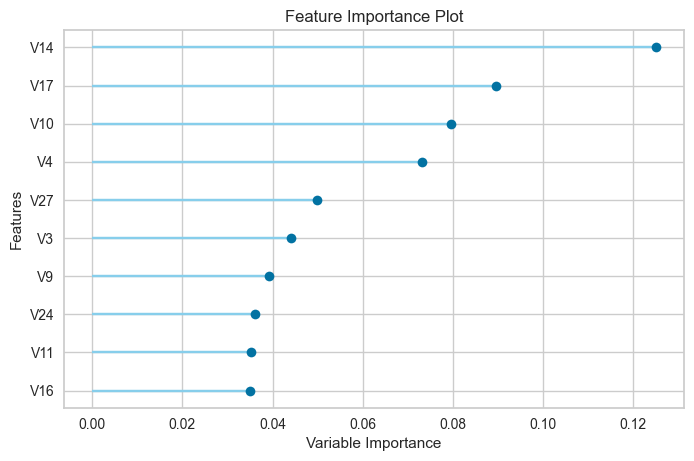

In [44]:
#Feature of XGBoost
plot_model(model, plot = 'feature')

In [45]:
#Evaluate Model
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

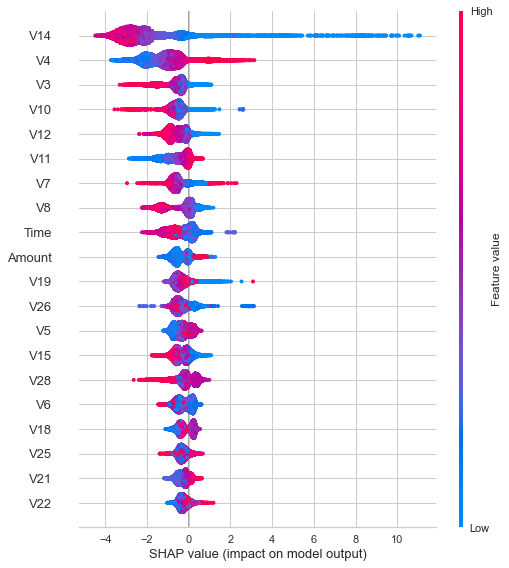

In [13]:
#Model Interpretation using SHAP (Shapley Additive Explaination) beeswarm plot
interpret_model(model)

In [46]:
results=predict_model(model)
results.to_csv("C:\\Users\\wongannnee\\Google Drive\\00- Full Stack 360TMG\\6-Placement\\StdChart\\ccpredictedfraud.csv", index = False)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9995,0.9732,1.0000,0.9996,0.9998,0.8538,0.8613


In [47]:
#Download model as pkl

import pickle
filename = "xgboost_fraud.pkl"  

with open(filename, 'wb') as file:  
    pickle.dump(model, file)
    